# Drawbacks of STFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, chirp

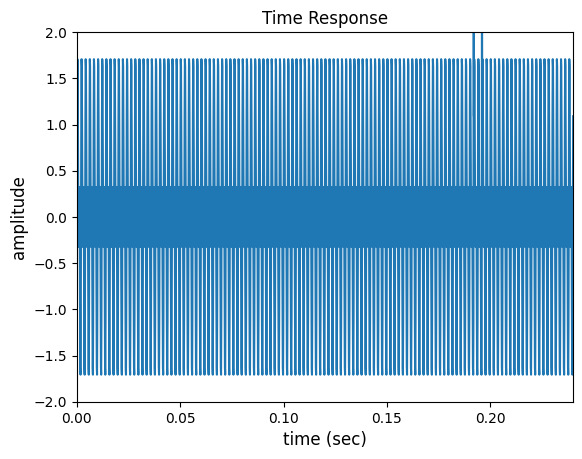

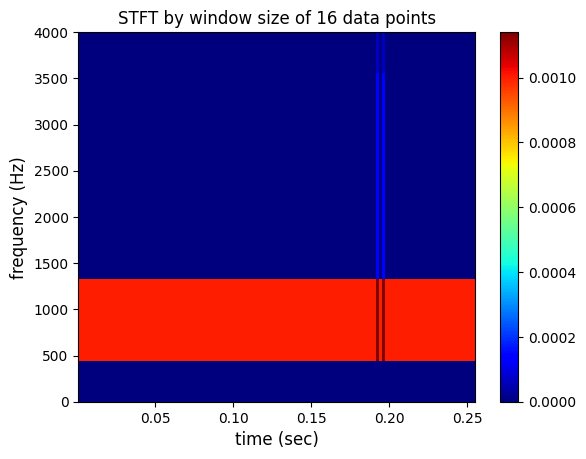

In [2]:
# Signal
v1 = 500 # first frequency
v2 = 1000 # second frequency
Fs = 8000 # sampling rate
t1 = 0.192 # location of the first impulse
t2 = 0.196 # location of the second impulse

# Create the time vector 
k = np.arange(1, 2049)
t = (k-1)/Fs

# Create the signal 
f = np.sin(2*np.pi*v1*t) + np.sin(2*np.pi*v2*t)

# Add two impulse responses into the signal
k = int(t1*Fs)
f[k] = f[k] + 3
k = int(t2*Fs)
f[k] = f[k] + 3

# Plot the time response of the signal
plt.figure()
plt.plot(t,f)
plt.axis([0, 0.24, -2, 2])
plt.title('Time Response', fontsize = 12)
plt.xlabel('time (sec)', fontsize = 12)
plt.ylabel('amplitude', fontsize = 12)

# Plot the STFT of the signal using a rectangular window of size 64
wd_size = 16 # Set window size
plt.figure()
f, t, Sxx = spectrogram(f, fs = Fs, window = np.ones(wd_size), nperseg = wd_size, noverlap = 0, nfft = wd_size)
plt.imshow(Sxx, extent=[t[0],t[-1],f[0],f[-1]], origin='lower', aspect='auto', cmap='jet')
plt.colorbar()
plt.title('STFT by window size of ' + str(wd_size) + ' data points', fontsize = 12)
plt.xlabel('time (sec)', fontsize = 12)
plt.ylabel('frequency (Hz)', fontsize = 12)
plt.show()


# Analysis of Quadratic Chirp Function by STFT

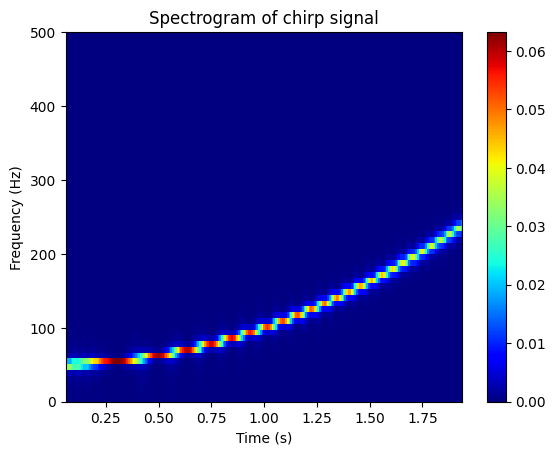

In [3]:
# Create time vector
t = np.arange(0, 2.001, 0.001)

# Initial and final frequencies and duration of the sweep
f0 = 50
f1 = 250
t1 = 2

# Generate chirp signal
x = chirp(t, f0, t1, f1, 'quadratic')

# Compute and display the PSD of signal x
plt.figure()
f, t, Sxx = spectrogram(x, window = np.ones(128), nperseg = 128, noverlap = 120, nfft = 128, fs = 1e3)
plt.pcolormesh(t, f, Sxx, cmap='jet')
plt.colorbar()
plt.ylim(f[0], f[-1])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of chirp signal')
plt.show()


# CWT Example by Analytic Morlet Wavelet
**Please refer to Pywavelets package to perform Wavelet Transform in Python. Follow the link to know more: https://pywavelets.readthedocs.io/en/latest/**

In [32]:
import pywt
import matplotlib.pyplot as plt

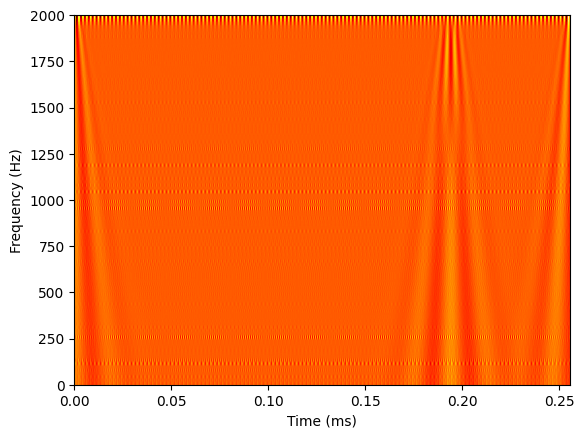

In [38]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
# Signal
v1 = 500 # first frequency
v2 = 1000 # second frequency
Fs = 8000 # sampling rate
t1 = 0.192 # location of the first impulse
t2 = 0.196 # location of the second impulse

# Create the time vector 
k = np.arange(1, 2049)
t = (k-1)/Fs

# Create the signal 
f = np.sin(2*np.pi*v1*t) + np.sin(2*np.pi*v2*t)

# Add two impulse responses into the signal
k = int(t1*Fs)
f[k] = f[k] + 3
k = int(t2*Fs)
f[k] = f[k] + 3

# Perform the CWT using the Morlet wavelet
wavelet = 'morl'
scales = np.arange(16, 128)
cwtmatr, freqs = pywt.cwt(f, scales, wavelet)

# Plot the result
plt.imshow(cwtmatr, extent=[0, t[-1], 0, 2000], cmap='hot', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.show()


# 1-D Wavelet Decomposition

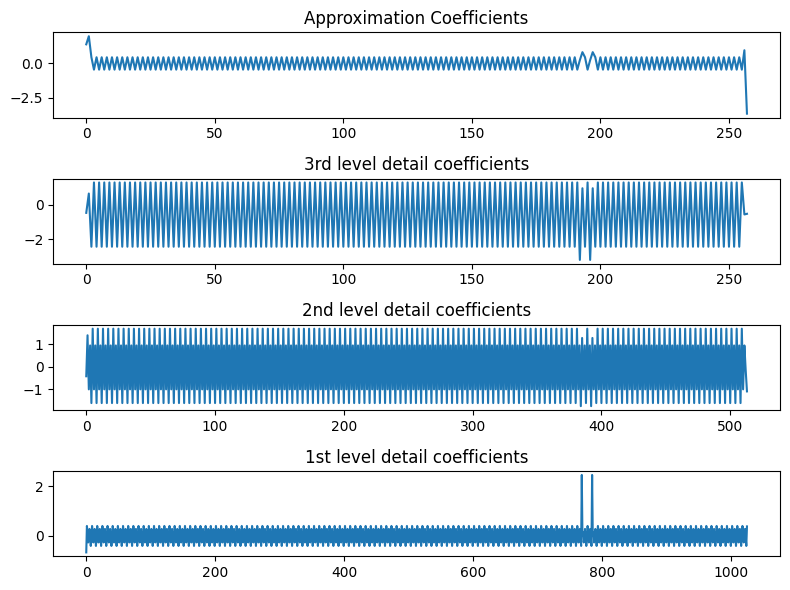

In [36]:
# Perform 3-level decomposition
coefs = pywt.wavedec(f, 'db2', level=3) #Use Daubechies 2 wavelet
cA3, cD3, cD2, cD1 = coefs

# Create figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 6))
# Plot original signal
axs[0].plot(cA3)
axs[0].set_title('Approximation Coefficients')
# Plot 3rd level detail coefficients
axs[1].plot(cD3)
axs[1].set_title('3rd level detail coefficients')
# Plot 2nd level detail coefficients
axs[2].plot(cD2)
axs[2].set_title('2nd level detail coefficients')
# Plot 1st level detail coefficients
axs[3].plot(cD1)
axs[3].set_title('1st level detail coefficients')
# Show figure
fig.tight_layout()
plt.show()



# Hilbert-Huang Transform (HHT)
**Please refers to PyEMD package to perform Emperical Mode Decomposition in Python. Please follow the link to know more:** https://pypi.org/project/EMD-signal/. **We also using HHT transfrom from scipy package in this example**

In [24]:
from PyEMD import EMD
import numpy as np
import pylab as plt

v1 = 50 # first frequency
v2 = 100 # second frequency
Fs = 10000 # sampling rate
t1 = 0.192 # location of the first impulse
t2 = 0.196 # location of the second impulse
k = np.arange(1,2049)
t = (k-1)/Fs # time vector
f = np.sin(2*np.pi*v1*t) + np.sin(2*np.pi*v2*t)

# Add two impulse responses into the signal
k = int(t1*Fs)
f[k] = f[k] + 3
k = int(t2*Fs)
f[k] = f[k] + 3

Text(0.5, 0, 'Time [s]')

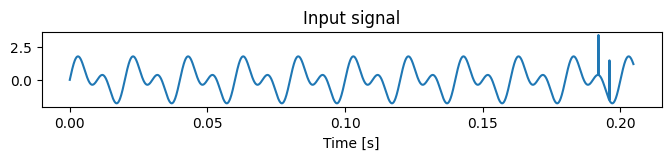

In [25]:
#Show signal
plt.figure(figsize=(8,8))
plt.subplot(N,1,1)
plt.plot(t, f)
plt.title("Input signal")
plt.xlabel("Time [s]")

In [26]:
# Execute EMD on signal
IMF = EMD().emd(f,t)
N = IMF.shape[0]+1

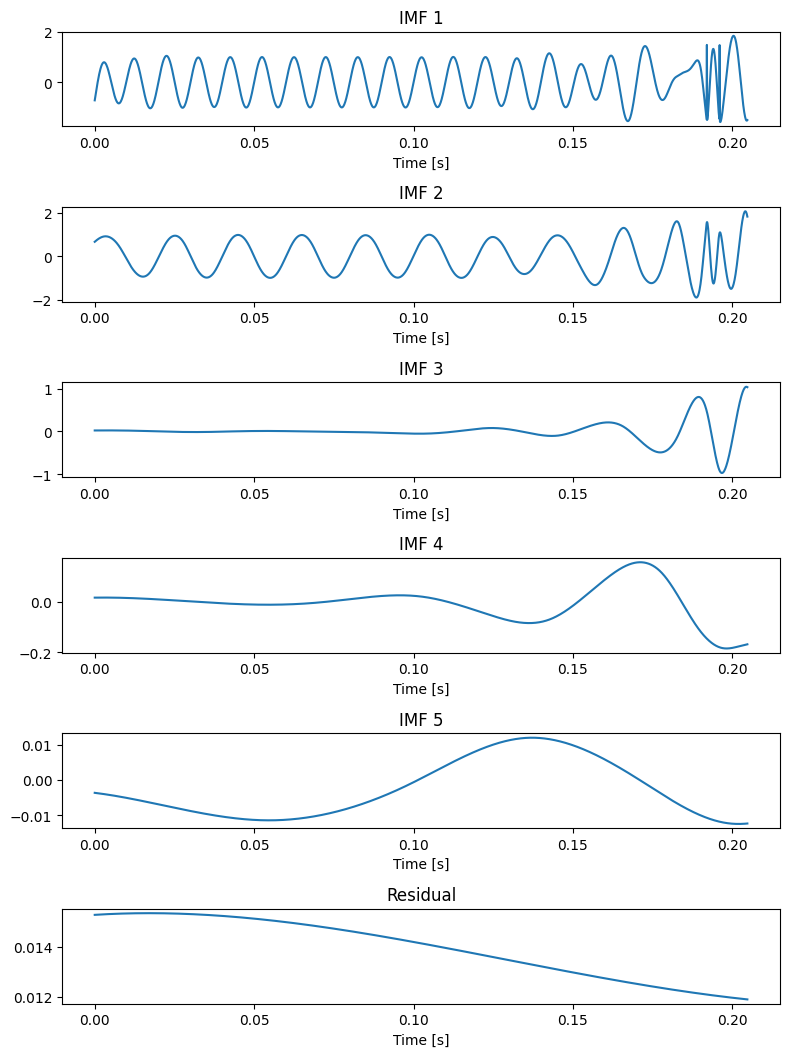

In [27]:
#plot all IMFs and Residual
plt.figure(figsize=(8, 12))
for n, imf in enumerate(IMF):
    plt.subplot(N, 1, n+1)
    plt.plot(t, imf)
    if n == N-2:
        plt.title("Residual")
    else:
        plt.title("IMF " + str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.show()


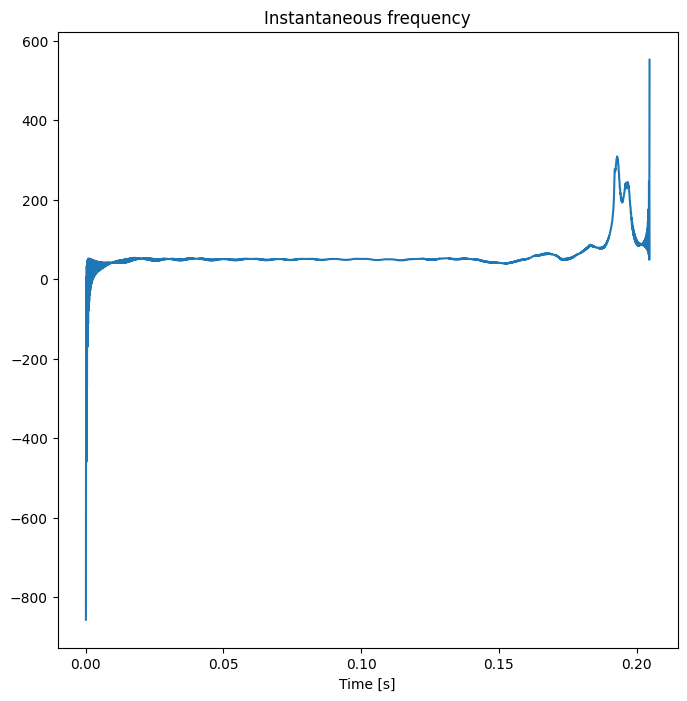

In [28]:
from scipy.signal import hilbert
#apply hilbert transform
analytic_signal = hilbert(IMF[1])
#calculate instantaneous frequency
inst_freq = np.diff(np.unwrap(np.angle(analytic_signal))) / (2*np.pi) * Fs
#plot
plt.figure(figsize=(8, 8))
plt.plot(t[1:], inst_freq)
plt.title("Instantaneous frequency")
plt.xlabel("Time [s]")
plt.show()